<a href="https://colab.research.google.com/github/davidwhitemsm/exploratory-data-analysis/blob/master/CSY_018_Summary_Statistics_NYS_Tuition_Assistance_Program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

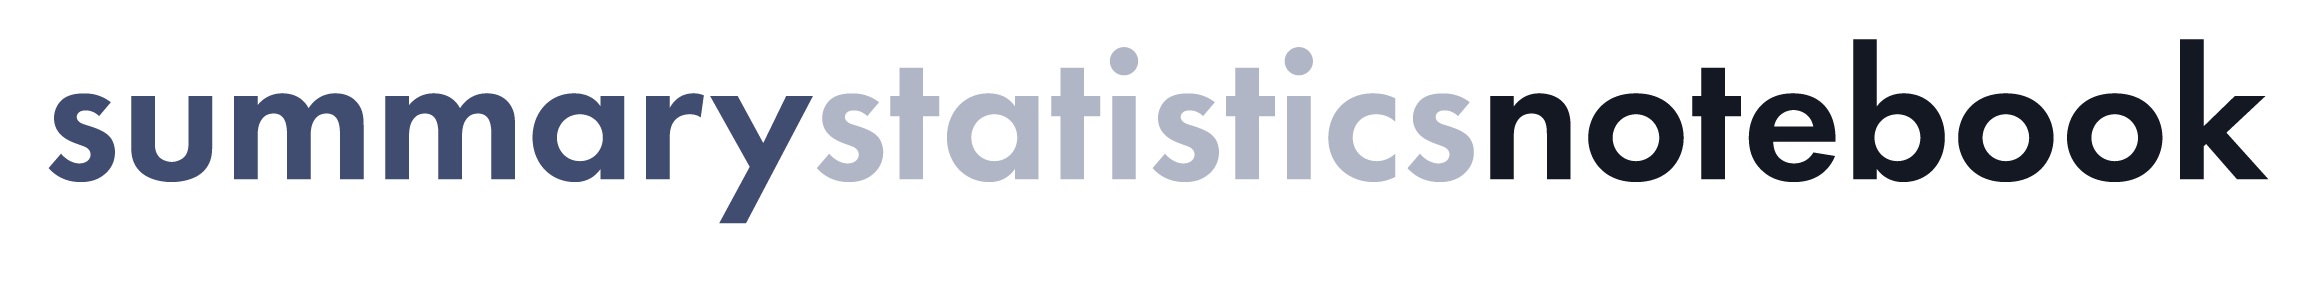

Catalogue Number: MSM-E29

Author: David White

Contact: david@msmdesign.nyc | msmdesign.nyc

Acknowledgements: NYC Open Data [https://opendata.cityofnewyork.us/]

Language: Python

Libraries Used: NumPy, pandas

## **About this Dataset**##


**Data Source: State of New York** 

Tuition Assistance Program (TAP) Fall Headcount By College, Sector Group, and Level of Study: Beginning 2000:

The Tuition Assistance Program (TAP), New York's largest student financial aid grant program, helps eligible New York residents attending in-state post-secondary institutions pay for tuition. TAP grants are based on the applicant’s and his or her family’s New York State taxable income. This data includes the number of recipients as measured by students receiving a TAP award for the fall semester beginning academic year 2000. https://catalog.data.gov/dataset/tuition-assistance-program-tap-fall-headcount-by-college-sector-group-and-level-of-study-b

In [32]:
# import the libraries needed for data analysis and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# import the dataset from GitHub anf glimpse

data = pd.read_csv("https://raw.githubusercontent.com/davidwhitemsm/selected-open-datasources/master/MSM-DS38-Tuition_Assistance_Program__TAP__Fall_Headcount_By_College__Sector_Group__and_Level_of_Study___Beginning_2000.csv")

In [34]:
data.head()

,Academic Year,TAP College Code,Federal School Code,Level,TAP Level of Study,TAP College Name,Sector Type,TAP Sector Group,TAP Fall Headcount
0,2019,8206,37133,U,4 yr Undergrad,BEIS MEDRASH HEICHAL DOVID,PRIVATE,9-CHAPTER XXII,18
1,2019,940,2849,U,4 yr Undergrad,SUNY PLATTSBURGH (UNDERGRAD),PUBLIC,3-SUNY SO,1936
2,2019,685,2816,U,4 yr Undergrad,SIENA COLLEGE,PRIVATE,5-INDEPENDENT,872
3,2019,6020,2857,U,4 yr Undergrad,SUNY COLLEGE OF TECH AT DELHI,PUBLIC,3-SUNY SO,557
4,2019,2051,2713,U,4 yr Undergrad,DOMINICAN COLLEGE-WEEKEND 4YR UG,PRIVATE,5-INDEPENDENT,4


In [35]:
data.columns

Index(['Academic Year', 'TAP College Code', 'Federal School Code', 'Level',
       'TAP Level of Study', 'TAP College Name', 'Sector Type',
       'TAP Sector Group', 'TAP Fall Headcount'],
      dtype='object')

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10153 entries, 0 to 10152
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Academic Year        10153 non-null  int64 
 1   TAP College Code     10153 non-null  int64 
 2   Federal School Code  10153 non-null  int64 
 3   Level                10153 non-null  object
 4   TAP Level of Study   10153 non-null  object
 5   TAP College Name     10153 non-null  object
 6   Sector Type          10153 non-null  object
 7   TAP Sector Group     10153 non-null  object
 8   TAP Fall Headcount   10153 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 714.0+ KB


In [37]:
# subset 2019 academic year only

data_2019 = data[data['Academic Year'] == 2019]

In [38]:
# glimpse subset of data

data_2019.head(10)

,Academic Year,TAP College Code,Federal School Code,Level,TAP Level of Study,TAP College Name,Sector Type,TAP Sector Group,TAP Fall Headcount
0,2019,8206,37133,U,4 yr Undergrad,BEIS MEDRASH HEICHAL DOVID,PRIVATE,9-CHAPTER XXII,18
1,2019,940,2849,U,4 yr Undergrad,SUNY PLATTSBURGH (UNDERGRAD),PUBLIC,3-SUNY SO,1936
2,2019,685,2816,U,4 yr Undergrad,SIENA COLLEGE,PRIVATE,5-INDEPENDENT,872
3,2019,6020,2857,U,4 yr Undergrad,SUNY COLLEGE OF TECH AT DELHI,PUBLIC,3-SUNY SO,557
4,2019,2051,2713,U,4 yr Undergrad,DOMINICAN COLLEGE-WEEKEND 4YR UG,PRIVATE,5-INDEPENDENT,4
5,2019,6093,2763,U,4 yr Undergrad,MARIA COLLEGE 4 YR,PRIVATE,5-INDEPENDENT,33
6,2019,1409,7273,U,4 yr Undergrad,CUNY BARUCH COLLEGE,PUBLIC,1-CUNY SR,5565
7,2019,1405,2696,U,2 yr Undergrad,CUNY NYC COLLEGE OF TECHNOLOGY,PUBLIC,1-CUNY SR,2344
8,2019,6315,10727,U,4 yr Undergrad,DEVRY COLLEGEE OF NEW YORK 4YR,PRIVATE,6-BUS. DEGREE,73
9,2019,35,2671,U,5 yr Undergrad,BARD COLLEGE 4YR UNDERGRAD,PRIVATE,5-INDEPENDENT,1


In [39]:
data_2019.tail(10)

,Academic Year,TAP College Code,Federal School Code,Level,TAP Level of Study,TAP College Name,Sector Type,TAP Sector Group,TAP Fall Headcount
406,2019,8202,42678,U,4 yr Undergrad,BAIS BINYOMIN ACADEMY,PRIVATE,9-CHAPTER XXII,12
407,2019,999,2834,U,4 yr Undergrad,EXCELSIOR COLLEGE 4YR UNDERGRAD,PRIVATE,5-INDEPENDENT,48
408,2019,575,2790,U,4 yr Undergrad,NYACK COLLEGE 4YR UNDERGRAD,PRIVATE,5-INDEPENDENT,241
409,2019,1535,21579,U,2 yr Undergrad,ISABELLA GRAHAM HART SCH PRAC NUR,PRIVATE,8-OTHER,6
410,2019,2275,7375,U,2 yr Undergrad,ISLAND DRAFTING & TECHNICAL INST.,PRIVATE,6-BUS. DEGREE,43
411,2019,1016,2894,U,4 yr Undergrad,UNIV OF ROCHESTER EASTMAN UG,PRIVATE,5-INDEPENDENT,20
412,2019,890,2840,U,4 yr Undergrad,SUNY UPSTATE MEDICAL UNIVERSITY,PUBLIC,3-SUNY SO,61
413,2019,775,2829,U,5 yr Undergrad,ST LAWRENCE UNIVERSITY 4YR UG,PRIVATE,5-INDEPENDENT,2
414,2019,2300,2772,U,2 yr Undergrad,MERCY COLL ASSOC DEGREE PROGRAM,PRIVATE,5-INDEPENDENT,23
415,2019,7124,5208,U,2 yr Undergrad,COLL WESTCHESTER 2YR,PRIVATE,6-BUS. DEGREE,129


##**(1) Find the total number of TAP recipients in 2019**##

In [40]:
headcount_2019 = data_2019['TAP Fall Headcount'].sum()

headcount_2019

258364

##**(2) Find the number of graduatve vs. undergraduate TAP recipients**##

In [41]:
level_2019 = data_2019.groupby('TAP Level of Study')

In [42]:
level_2019['TAP Fall Headcount'].sum()

TAP Level of Study
2 yr Undergrad     78899
4 yr Undergrad    176958
5 yr Undergrad      2507
Name: TAP Fall Headcount, dtype: int64



```
# This is formatted as code
```

##**(3) Find the numer of public vs. private university TAP recipients**##

In [43]:
sector_2019 = data_2019.groupby('Sector Type')

In [44]:
sector_2019['TAP Fall Headcount'].sum()

Sector Type
PRIVATE     68738
PUBLIC     189626
Name: TAP Fall Headcount, dtype: int64

In [45]:
# what perecentage of TAP recipients attended public universities

print(189626/headcount_2019)

0.7339490021829667


##**(4) Find the sector group with the most TAP recipients**##

In [46]:
sector_group = data_2019.groupby('TAP Sector Group')

In [47]:
sector_group['TAP Fall Headcount'].sum()

TAP Sector Group
1-CUNY SR         59647
2-CUNY CC         24891
3-SUNY SO         66085
4-SUNY CC         39003
5-INDEPENDENT     53768
6-BUS. DEGREE      9014
7-BUS. NON-DEG      538
8-OTHER              21
9-CHAPTER XXII     5397
Name: TAP Fall Headcount, dtype: int64

##**(5) Find the total number of colleges attended by TAP recipients in 2019**##

In [48]:
colleges_2019 = len(data_2019['TAP College Name'].unique())

colleges_2019

300

In [53]:
# list all schools attended

data_2019['TAP College Name'].unique()

array(['BEIS MEDRASH HEICHAL DOVID', 'SUNY PLATTSBURGH (UNDERGRAD)',
       'SIENA COLLEGE', 'SUNY COLLEGE OF TECH AT DELHI',
       'DOMINICAN COLLEGE-WEEKEND 4YR UG', 'MARIA COLLEGE 4 YR',
       'CUNY BARUCH COLLEGE', 'CUNY NYC COLLEGE OF TECHNOLOGY',
       'DEVRY COLLEGEE OF NEW YORK 4YR', 'BARD COLLEGE 4YR UNDERGRAD',
       "ST JOHN'S RIVERSIDE HOSP NURS", 'UNION COLLEGE 4YR UNDERGRAD',
       'YESHIVA SHAAR EPHRAIM', 'PLAZA COLLEGE-2YR UNDERGRAD',
       'SUNY ALBANY 4 YR (UNDERGRAD)', 'VILLA MARIA COLL OF BUFFALO 4YR',
       "YESHIVA D'MONSEY", 'SUNY POLYTECHNIC INSTITUTE',
       'MOLLOY COLLEGE 4YR UNDERGRAD', 'ORANGE COUNTY COMMUNITY COLLEGE',
       'CUNY MEDGER EVERS COLLEGE', 'ST JOHN FISHER COLLEGE UNDERGRAD',
       'CUNY JOHN JAY COLLEGE', 'SUC CORTLAND (UNDERGRAD)',
       'SUC PURCHASE (UNDERGRAD)', 'ARNOT OGDEN MED CTR NURSING 4YR',
       'CUNY CITY COLLEGE', 'FASHION INST TECH-LOWER DIVISION',
       'BET MEDRASH GADOL ATEREST TORAH', 'ELMIRA COLLEGE 4YR UNDERGR

##**(6) Find the school with the most TAP recipients**##

In [49]:
max_students =data_2019.sort_values(by=['TAP Fall Headcount'],ascending=False)



In [50]:
max_students.head(10)

,Academic Year,TAP College Code,Federal School Code,Level,TAP Level of Study,TAP College Name,Sector Type,TAP Sector Group,TAP Fall Headcount
210,2019,1404,2691,U,2 yr Undergrad,CUNY MANHATTAN CC,PUBLIC,2-CUNY CC,7790
77,2019,1010,2837,U,4 yr Undergrad,SUNY BUFFALO 4 YR (UNDERGRAD),PUBLIC,3-SUNY SO,7439
321,2019,1413,2689,U,4 yr Undergrad,CUNY HUNTER COLLEGE,PUBLIC,1-CUNY SR,7306
319,2019,1414,2693,U,4 yr Undergrad,CUNY JOHN JAY COLLEGE,PUBLIC,1-CUNY SR,6756
324,2019,1416,2690,U,4 yr Undergrad,CUNY QUEENS COLLEGE,PUBLIC,1-CUNY SR,6058
286,2019,875,2838,U,4 yr Undergrad,SUNY STONY BROOK 4YR UNDERGRAD,PUBLIC,3-SUNY SO,6047
65,2019,1410,2687,U,4 yr Undergrad,CUNY BROOKLYN COLLEGE,PUBLIC,1-CUNY SR,6024
28,2019,1411,2688,U,4 yr Undergrad,CUNY CITY COLLEGE,PUBLIC,1-CUNY SR,5739
6,2019,1409,7273,U,4 yr Undergrad,CUNY BARUCH COLLEGE,PUBLIC,1-CUNY SR,5565
14,2019,895,2835,U,4 yr Undergrad,SUNY ALBANY 4 YR (UNDERGRAD),PUBLIC,3-SUNY SO,5408
